<a href="https://colab.research.google.com/github/kspohn903/Spohn/blob/master/Archer_Analytics%26WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# List of Required Packages: ---------------------------------------------------
!pip3 install --upgrade bs4
!pip3 install --upgrade requests_html
!pip3 install pandas==1.1.0
!pip3 install --upgrade urllib3
!pip install --upgrade google-cloud
!pip3 install  numpy==1.19.2
!pip3 install  folium==0.2.1
!pip3 install  imgaug==0.2.5
!pip3 install --upgrade bs4
!pip3 install --upgrade requests_html
!pip3 install --upgrade pandas
!pip install --upgrade seaborn
!pip install --upgrade google-cloud
!pip install --upgrade scipy
!pip install --upgrade numpy

# # PROPER MATPLOTLIB INSTALLER
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

# !notebook --NotebookApp.iopub_data_rate_limit=1.0e10

#  #For future reference: uploading file to 
# gDrive/Colab directly from filepathselector menu, via command...
# files.download('path/to/your/file')
# ------------------------------------------------------------------------------
#  Google Mount: ---------------------------------------------------------------
from google.colab import drive, files, auth
drive.mount('/content/drive', force_remount = True) #mounted / forcibly-remounted

Max Number of Season(s): 11
colors: [[0.         0.         0.5        1.        ]
 [0.         0.         0.9456328  1.        ]
 [0.         0.3        1.         1.        ]
 [0.         0.69215686 1.         1.        ]
 [0.16129032 1.         0.80645161 1.        ]
 [0.49019608 1.         0.47754586 1.        ]
 [0.80645161 1.         0.16129032 1.        ]
 [1.         0.77051561 0.         1.        ]
 [1.         0.40740741 0.         1.        ]
 [0.9456328  0.02977487 0.         1.        ]
 [0.5        0.         0.         1.        ]]

All Seasons successfully printed to figure.



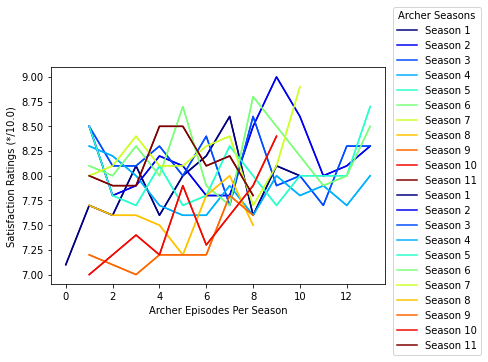

In [ ]:
# -*- coding: utf-8 -*-
import csv, numpy as np, pandas as pd, datetime, gc, re, requests, urllib3, sys
import traceback, seaborn as sns, scipy as sci, math, matplotlib.pyplot as plt
import matplotlib.transforms as mt, gzip, matplotlib.pylab as pl
  
from matplotlib.transforms import offset_copy 
from bs4 import BeautifulSoup as bs
from google.colab import files
from matplotlib.font_manager import FontProperties
try:
    # episodeFilePathName = 'drive/MyDrive/title.episode.tsv.gz'
    # ratingsFilePathName = 'drive/MyDrive/title.ratings.tsv.gz'
    # dfRatings = pd.read_csv(ratingsFilePathName, compression='gzip', header=0, sep='\t', quotechar='"')
    # # dfRatings.head()
    # # print(f"dfRatings:\n{dfRatings}\n")
    # dfEpisodes = pd.read_csv(episodeFilePathName, compression='gzip', header=0, sep='\t', quotechar='"')
    # # dfEpisodes.head()
    # # print(f"dfEpisodes:\n{dfEpisodes}\n") # Archer = 'tt1486217'

    # archerRatings = dfRatings[dfRatings['tconst'] == 'tt1486217'][['averageRating']]
    # # print(f"archerRatings:\n{archerRatings}\n")
    # # dfEpisodes.sort_values(by=['seasonNumber'], inplace=True, 
    # # ascending=True, na_position='last',)

    # # print(f"dfEpisodesSorted:\n{dfEpisodes}\n")
    # #                         1   2  3    4   5   6   7   8  9  10  11
    # seasonNo =               [1,  2,  3,  4,  5,  6,  7,  8, 9, 10, 11]
    # totalEpisodesPerSeason = [11, 13, 13, 13, 13, 13, 10, 8, 8,  9, 8] 
    # #mutate these for any title you want to run # satisfaction analytics per season on 
    # dfArcher = dfEpisodes[dfEpisodes['parentTconst'] == 'tt1486217']
    # print(f"dfArcher:\n{dfArcher}\n")
    # archerBySeason = dfArcher[["seasonNumber"]].values
    # archerByEpisode = dfArcher[["episodeNumber"]].values
    # print(f"archerRatings:\n{archerRatings}\narcherBySeason:{[el1[0] for el1 in archerBySeason]}\narcherByEpisode:{[el2 [0] for el2 in archerByEpisode]}\n")
    # # print(f"archerRatings:\n{archerRatings}\narcherBySeason:{archerSeasonArr}\narcherByEpisode:{archerEpisodeArr}\n")
    # # New Plan: Mutate episodes by season count, getting archerBySeason[i], 
    # # mutate each archerByEpisode column "for el in archerByEpisode:\nel[0] = str(int(el[0]) + ... for k in range(0,indexMatched)"
    # aBSArr = [int (el1[0]) for el1 in archerBySeason]
    # aBEArr = [int (el2 [0]) for el2 in archerByEpisode]
    # noSeasonsEps = []
    # for i in range(0,len(aBSArr),1):
    #     archerEpisodes.append([aBSArr[i],aBEArr[i]])
    # print(f"archerEpisodes: {archerEpisodes}\n")
    
    fig = plt.figure()
    archerShow = { "Episodes Per Season" : { "Season 1": [0,1,2,3,4,5,6,7,8,9,10], 
                                 "Season 2": [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                                 "Season 3": [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                                 "Season 4": [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                                 "Season 5": [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                                 "Season 6": [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                                 "Season 7": [1,2,3,4,5,6,7,8,9,10], 
                                 "Season 8": [1,2,3,4,5,6,7,8], 
                                 "Season 9": [1,2,3,4,5,6,7,8], 
                                 "Season 10": [1,2,3,4,5,6,7,8,9], 
                                 "Season 11": [1,2,3,4,5,6,7,8] 
                               }, 
                  "Ratings Per Episode": { "Season 1": [7.1, 7.7, 7.6, 8.1, 7.6, 8.0, 8.2, 8.6, 7.6, 8.1, 8.0], 
                      "Season 2": [8.5, 7.8, 7.9, 8.2, 8.1, 7.8, 7.8, 8.5, 9.0, 8.6, 8.0, 8.1, 8.3], 
                      "Season 3": [8.5, 8.1, 8.1, 8.3, 8.0, 8.4, 7.7, 8.6, 7.9, 8.0, 7.7, 8.3, 8.3],
                      "Season 4": [8.3, 8.2, 8.0, 7.7, 7.6, 7.6, 7.9, 7.6, 8.0, 7.8, 7.9, 7.7, 8.0], 
                      "Season 5": [8.5, 7.8, 7.7, 8.1, 7.7, 7.8, 8.3, 8.0, 7.7, 8.0, 8.0, 8.0, 8.7], 
                      "Season 6": [8.1, 8.0, 8.3, 8.0, 8.7, 7.9, 7.7, 8.8, 8.5, 8.2, 7.9, 8.0, 8.5], 
                      "Season 7": [8.0, 8.1, 8.4, 8.1, 8.1, 8.3, 8.4, 7.7, 8.1, 8.9],
                      "Season 8": [7.7, 7.6, 7.6, 7.5, 7.2, 7.8, 8.0, 7.5], 
                      "Season 9": [7.2, 7.1, 7.0, 7.2, 7.2, 7.2, 7.8, 7.6], 
                      "Season 10": [7.0, 7.2, 7.4, 7.2, 7.9, 7.3, 7.6, 7.9, 8.4], 
                      "Season 11": [8.0, 7.9, 7.9, 8.5, 8.5, 8.1, 8.2, 7.8]  
                 }  }
    jsonCategories = ["Episodes Per Season", "Ratings Per Episode"]
    n = len(archerShow[jsonCategories[0]].keys())
    colors = pl.cm.jet(np.linspace(0,1,n))
    print(f"Max Number of Season(s): {n}\ncolors: {colors}\n")
    
    for i in range(0,len(jsonCategories),1): #create an n*m map of the [jsonCategories[i], f"Season {n}"] 
        for j in range(0, n, 1):
            plt.plot(archerShow[jsonCategories[0]]["Season {}".format(j+1)],
                     archerShow[jsonCategories[1]]["Season {}".format(j+1)],
                     color = colors[j], label="Season {}".format(j+1) )    
            # print(f"Successfully appended plot data for Season {j+1}\n")
    print("All Seasons successfully printed to figure.\n")
    plt.xlabel("Archer Episodes Per Season")
    plt.ylabel("Satisfaction Ratings (*/10.0)")   
    plt.legend(title='Archer Seasons',  bbox_to_anchor=(1.30, 1.30), loc='upper right')
    fig.savefig('ArcherSatisfactionEpisodes.jpeg')

except IOError: 
       print(f"Failure to properly close/read file (IO). Please check stack trace and try again.\n")
       traceback.print_exc()
except EOFError:
       print(f"Failure to properly read/parse file properly or has reached EOF.Please check stack trace and try again.\n")
       traceback.print_exc()
except IndentationError: 
       print(f"Failure to properly indent. Please check stack trace and try again.\n")
       traceback.print_exc()
except ImportError: 
       print(f"Import has failed. Please check imports and try again.\n")
       traceback.print_exc()
except Exception: 
       print(f"General Exception has occurred. Please check stack trace and try again.\n")
       traceback.print_exc()
except Error: 
       print(f"General Error has occurred. Please check stack trace and try again.\n")
       traceback.print_exc()